Test for using Colab as a machine resource to run python code representing Denoising AutoEncoder

Import modules, upload mnist data, data normalization, apply noise

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


Data normalization to values in range [0-1] and reshape to array suitable for network

In [0]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Apply noise with noise factor 0.5

In [0]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

That is how the first 10 noisy input images looks like

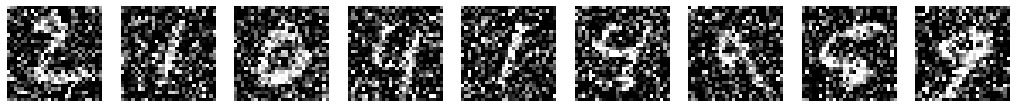

In [11]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Convolutional AutoEncoder model

In [0]:
input_img = Input(shape=(28, 28, 1))  # shape of the images that wil be on input

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train network for 10 epochs with noisy images as input and correct images as desired output

In [17]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.1428 - val_loss: 0.1221
Epoch 2/100
60000/60000 [==============================] - 8s 135us/step - loss: 0.1172 - val_loss: 0.1093
Epoch 3/100
60000/60000 [==============================] - 11s 182us/step - loss: 0.1108 - val_loss: 0.1099
Epoch 4/100
60000/60000 [==============================] - 13s 209us/step - loss: 0.1075 - val_loss: 0.1044
Epoch 5/100
60000/60000 [==============================] - 13s 211us/step - loss: 0.1054 - val_loss: 0.1076
Epoch 6/100
60000/60000 [==============================] - 13s 215us/step - loss: 0.1037 - val_loss: 0.1011
Epoch 7/100
60000/60000 [==============================] - 13s 212us/step - loss: 0.1027 - val_loss: 0.1000
Epoch 8/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.1019 - val_loss: 0.1009
Epoch 9/100
60000/60000 [==============================] - 13s 210us/step - loss: 0.1014

Testing the denoising autoencoder and visualizing images on input and output of autoencoder

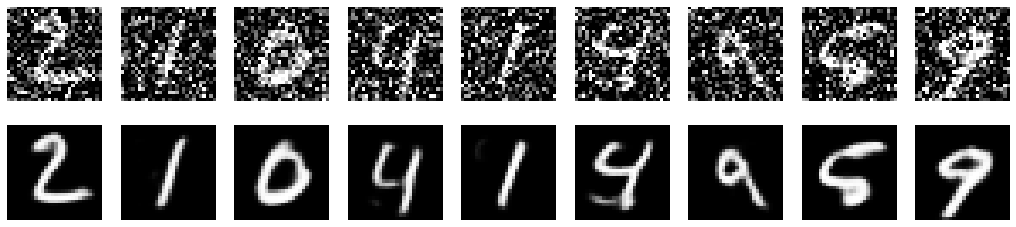

In [18]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()